Logistic Regression Accuracy: 0.9538
Confusion Matrix for Logistic Regression:
 [[   0  462]
 [   0 9538]]
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

 Lung Cancer       0.00      0.00      0.00       462
        None       0.95      1.00      0.98      9538

    accuracy                           0.95     10000
   macro avg       0.48      0.50      0.49     10000
weighted avg       0.91      0.95      0.93     10000

Decision Tree Accuracy: 0.8872
Confusion Matrix for Decision Tree:
 [[  28  434]
 [ 694 8844]]
Classification Report for Decision Tree:
               precision    recall  f1-score   support

 Lung Cancer       0.04      0.06      0.05       462
        None       0.95      0.93      0.94      9538

    accuracy                           0.89     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.91      0.89      0.90     10000

Random Forest Accuracy: 0.9538
Confusion Matrix for Ra

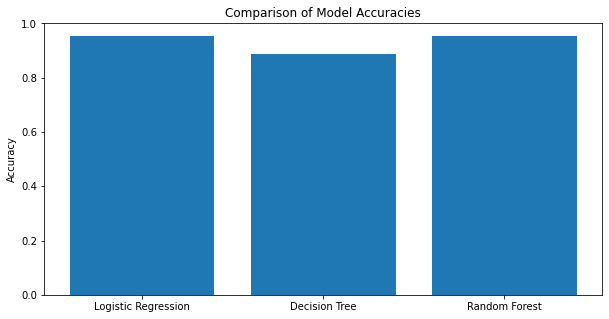

Logistic Regression prediction for the first sample: ['None']
Decision Tree prediction for the first sample: ['None']
Random Forest prediction for the first sample: ['None']


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Loading the data
df = pd.read_csv('Health_Data_50k_English.csv')

# Removing columns not used in the model
df.drop(['Full Name'], axis=1, inplace=True)

# Data preparation
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'Alcohol Consumption', 'Physical Activity', 'Diet', 'Obesity']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Splitting the data into training and testing sets
X = df.drop('Diagnosed Disease', axis=1)
y = df['Diagnosed Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalising the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy}')
    print(f'Confusion Matrix for {name}:\n', confusion_matrix(y_test, predictions))
    print(f'Classification Report for {name}:\n', classification_report(y_test, predictions, zero_division=0))

# Plotting the accuracies
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values())
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()

# Making a prediction sample
sample = X_test[0].reshape(1, -1)  # Reshape for a single sample
for name, model in models.items():
    prediction = model.predict(sample)
    print(f'{name} prediction for the first sample: {prediction}')


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pickle

# Loading the data
df = pd.read_csv('Health_Data_50k_English.csv')

# Removing columns not used in the model
df.drop(['Full Name'], axis=1, inplace=True)

# Data preparation
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'Alcohol Consumption', 'Physical Activity', 'Diet', 'Obesity']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Splitting the data into training and testing sets
X = df.drop('Diagnosed Disease', axis=1)
y = df['Diagnosed Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalising the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

# Save the models and scaler to a pickle file
with open('trained_models_scaler.pkl', 'wb') as file:
    pickle.dump((models, scaler), file)


In [38]:
import pandas as pd
import numpy as np
import random
import pickle
from sklearn.preprocessing import LabelEncoder

# Load the models and scaler from the pickle file
with open('trained_models_scaler.pkl', 'rb') as file:
    models, scaler = pickle.load(file)

# Load the new dataset
new_df = pd.read_csv('Detailed_Patient_Health_Data.csv')

# Verify and adjust column names based on the actual columns available in your new dataset
print("Columns in new dataset:", new_df.columns.tolist())

# Adjust this list based on the actual data
required_columns = [
    'Age', 'Gender', 'Alcohol Consumption', 'Physical Activity', 'Diet', 'Obesity',
    'Diastolic Blood Pressure (mmHg)', 'HDL Cholesterol (mg/dL)', 'LDL Cholesterol (mg/dL)', 
    'Triglycerides (mg/dL)', 'Systolic Blood Pressure (mmHg)'
]

# Ensure these columns exist in the dataset
if not all(col in new_df.columns for col in required_columns):
    raise ValueError("One or more required columns are missing from the new dataset.")

# Continue processing as before
new_df_numeric = new_df[required_columns]
new_df_scaled = scaler.transform(new_df_numeric)
random_index = random.randint(0, len(new_df) - 1)
random_user_scaled = new_df_scaled[random_index].reshape(1, -1)

for name, model in models.items():
    prediction = model.predict(random_user_scaled)
    print(f'{name} prediction for the randomly selected user: {prediction}')


Columns in new dataset: ['Full_Name', 'Date_of_Birth', 'Gender', 'Email', 'Phone_Number', 'Address', 'Existing_Medical_Conditions', 'Current_Medications', 'Past_Surgeries', 'Diet', 'Smoke', 'Alcohol', 'Physical_Exercise', 'Family_Health_Issues']


ValueError: One or more required columns are missing from the new dataset.

In [39]:
import pickle

# Caminho para o arquivo .pkl
file_path = 'trained_models_scaler.pkl'

# Carregando o arquivo
with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Imprimindo o conteúdo do objeto
print(data)

# Se o objeto for complexo ou um DataFrame, você pode querer imprimir de forma mais estruturada
if isinstance(data, dict):
    for key, value in data.items():
        print(f"Chave: {key}, Valor: {value}")
elif hasattr(data, 'head'):  # Checa se é um DataFrame do pandas
    print(data.head())  # Imprime as primeiras linhas do DataFrame
else:
    print(data)  # Imprime o objeto diretamente


({'Logistic Regression': LogisticRegression(), 'Decision Tree': DecisionTreeClassifier(), 'Random Forest': RandomForestClassifier()}, StandardScaler())
({'Logistic Regression': LogisticRegression(), 'Decision Tree': DecisionTreeClassifier(), 'Random Forest': RandomForestClassifier()}, StandardScaler())


In [40]:
import pandas as pd
import numpy as np
import random
import pickle
from sklearn.preprocessing import LabelEncoder

# Load the models and scaler from the pickle file
with open('trained_models_scaler.pkl', 'rb') as file:
    models, scaler = pickle.load(file)

# Load the new dataset
new_df = pd.read_csv('Detailed_Patient_Health_Data.csv')

# Check and verify the column names
print("Columns in new dataset:", new_df.columns.tolist())

# Adjust this based on the actual data columns available
required_columns = ['Gender', 'Diet', 'Smoke', 'Alcohol', 'Physical_Exercise']  # Example of possible available columns

# Ensure these columns exist in the dataset
if not all(col in new_df.columns for col in required_columns):
    raise ValueError("One or more required columns are missing from the new dataset.")

# Adjust label encoding for categorical columns that are available and used by models
for col in required_columns:
    if col in new_df.columns:
        le = LabelEncoder()
        new_df[col] = le.fit_transform(new_df[col])

# Prepare the data using only the available numeric columns
new_df_numeric = new_df[required_columns]
new_df_scaled = scaler.transform(new_df_numeric)  # Normalize data

# Select a random user from the new dataset
random_index = random.randint(0, len(new_df) - 1)
random_user_scaled = new_df_scaled[random_index].reshape(1, -1)

# Make predictions with each of the trained models
for name, model in models.items():
    prediction = model.predict(random_user_scaled)
    print(f'{name} prediction for the randomly selected user: {prediction}')


Columns in new dataset: ['Full_Name', 'Date_of_Birth', 'Gender', 'Email', 'Phone_Number', 'Address', 'Existing_Medical_Conditions', 'Current_Medications', 'Past_Surgeries', 'Diet', 'Smoke', 'Alcohol', 'Physical_Exercise', 'Family_Health_Issues']


/Users/edgardpacheco/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Alcohol
- Physical_Exercise
- Smoke
Feature names seen at fit time, yet now missing:
- Age
- Alcohol Consumption
- Diastolic Blood Pressure (mmHg)
- HDL Cholesterol (mg/dL)
- LDL Cholesterol (mg/dL)
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 5 features, but StandardScaler is expecting 13 features as input.

In [45]:
import pandas as pd
import numpy as np
import random
import pickle
from sklearn.preprocessing import LabelEncoder

# Load the models and scaler from the pickle file
with open('trained_models_scaler.pkl', 'rb') as file:
    models, scaler = pickle.load(file)

# Load the new dataset
new_df = pd.read_csv('Detailed_Patient_Health_Data.csv')

# Print the columns to check what we have
print("Columns available:", new_df.columns.tolist())

# Assuming we need to transform some columns
# Example: Encode 'Gender', 'Diet', 'Smoke', 'Alcohol', 'Physical_Exercise'
# These need to be adapted based on actual available data and what models were trained on
categorical_cols = ['Gender', 'Diet']  # Adapt based on your data
for col in categorical_cols:
    if col in new_df.columns:
        le = LabelEncoder()
        new_df[col] = le.fit_transform(new_df[col])

# Assuming 'Age' needs to be calculated or is directly available
# If 'Date_of_Birth' is available:
if 'Date_of_Birth' in new_df.columns:
    new_df['Age'] = 2023 - pd.to_datetime(new_df['Date_of_Birth']).dt.year

# Select a random user
random_user = new_df.sample(n=1)

# Prepare data for prediction: select and scale the necessary columns
# Assuming you have a list of necessary columns from your model training
required_columns = ['Age', 'Gender', 'Diet']  # Add more as per your model
user_data_for_prediction = scaler.transform(random_user[required_columns])

# Making predictions using the loaded models
for name, model in models.items():
    prediction = model.predict(user_data_for_prediction)
    print(f'{name} prediction for the selected user: {prediction}')


Columns available: ['Full_Name', 'Date_of_Birth', 'Gender', 'Email', 'Phone_Number', 'Address', 'Existing_Medical_Conditions', 'Current_Medications', 'Past_Surgeries', 'Diet', 'Smoke', 'Alcohol', 'Physical_Exercise', 'Family_Health_Issues']


/Users/edgardpacheco/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- Alcohol Consumption
- Diastolic Blood Pressure (mmHg)
- HDL Cholesterol (mg/dL)
- LDL Cholesterol (mg/dL)
- Obesity
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 3 features, but StandardScaler is expecting 13 features as input.